<a href="https://colab.research.google.com/github/Telthor/MNIST/blob/main/rf_mw_combiner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 18.1 MB/s 


In [2]:
import numpy as np
import plotly.graph_objects as go
import skrf as rf
from skrf.media import CPW, Coaxial

## Very basic bias tee thingamy, I have a small understanding of this bit

In [13]:

# Setup a frequency object to be swept
freq = rf.Frequency(1e-3, 15, 1001, 'ghz', sweep_type='log')

# Line defined as having 50 ohm impedance, ideally this would be a proper CPW simulation, 
# as it definitely isn't accurate to the geometry of the designed pcb
line = rf.media.DefinedGammaZ0(frequency=freq, z0=50)
LC_manual = line.inductor(24e-9) ** line.capacitor(70e-12)

# 3 input ports
port1 = rf.Circuit.Port(frequency=freq, name='port1', z0=50)
port2 = rf.Circuit.Port(frequency=freq, name='port2', z0=50)
port3 = rf.Circuit.Port(frequency=freq, name='port3', z0=50)
# cap = rf.Circuit.SeriesImpedance(frequency=freq, name='cap', z0=50,
#                                  Z=1/(1j*freq.w*1e-12))
# cap2 = rf.Circuit.SeriesImpedance(frequency=freq, name='cap2', z0=50,
#                                  Z=1/(1j*freq.w*1e-12))
# ind = rf.Circuit.SeriesImpedance(frequency=freq, name='ind', z0=50,
#                                  Z=1j*freq.w*0.5e-6)

# shared ground
ground1 = rf.Circuit.Ground(frequency=freq, name='ground1', z0=50)

# Components 
cap = line.capacitor(1e-12, name='cap')
ind = line.inductor(0.2e-6, name='ind')
cap2 = line.capacitor(1e-1, name='cap2')
# transf1 = line.tr

# NB: it is also possible to create 2-port lumped elements like:
# line = rf.media.DefinedGammaZ0(frequency=freq, z0=50)
# cap = line.capacitor(70e-12, name='cap',)
# ind = line.inductor(24e-9, name='ind')

# Setup connections 
connections = [
    [(port2, 0), (cap, 0)],
    [(cap, 1), (ind, 0), (port1, 0)],
    [(ind, 1), (port3, 0)]
]

connections = [
               [(port1, 0), (ind, 0), (cap, 0)],
               [(port2, 0), (ind, 1), (cap2, 0)],
               [(port3, 0), (cap, 1)],
               [(cap2, 1), (ground1, 0)]
]

circuit = rf.Circuit(connections)
LC_from_circuit = circuit.network


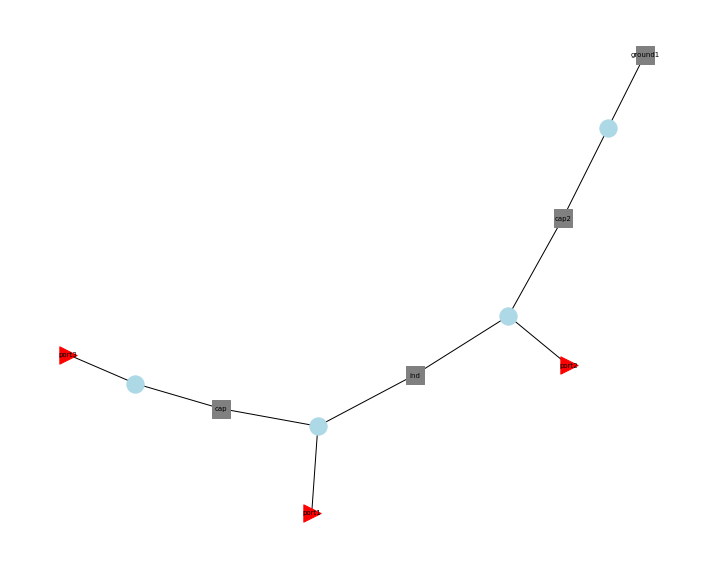

In [14]:
circuit.plot_graph(network_labels=True, port_labels=True)

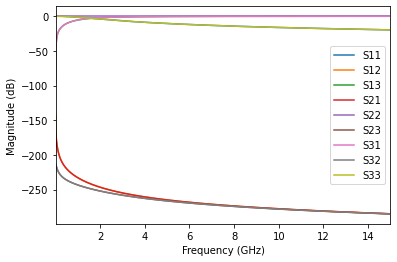

In [15]:
# Plot based on scattering matrix
fig=LC_from_circuit.plot_s_db()

In [11]:
# Plot in plotly
s_db = 10 * np.log10(np.real(LC_from_circuit.s))
s_db = LC_from_circuit.s_db

fig = go.Figure()
fig.add_scatter(x=freq.f, y=s_db[:, 1, 0], name='RF Line')
fig.add_scatter(x=freq.f, y=s_db[:, 1, 1], name='RF Line reflectance')
fig.add_scatter(x=freq.f, y=s_db[:, 2, 0], name='MW LINE')
fig.add_scatter(x=freq.f, y=s_db[:, 1, 2], name='Isolation')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log10



In [ ]:
LC_from_circuit.s_db

array([[[-3.01484981e+01, -4.19941641e-03, -7.00442617e+01],
        [-4.19941641e-03, -3.01484963e+01, -7.00612024e+01],
        [-7.00442617e+01, -7.00612024e+01, -8.58108046e-07]],

       [[-3.00790234e+01, -4.26716855e-03, -6.99745141e+01],
        [-4.26716855e-03, -3.00790216e+01, -6.99917277e+01],
        [-6.99745141e+01, -6.99917277e+01, -8.71973148e-07]],

       [[-3.00095498e+01, -4.33601325e-03, -6.99047632e+01],
        [-4.33601325e-03, -3.00095480e+01, -6.99222542e+01],
        [-6.99047632e+01, -6.99222542e+01, -8.86062513e-07]],

       ...,

       [[-6.50886405e+00, -4.57881959e+01, -1.09826116e+00],
        [-4.57881959e+01, -1.67514366e-04, -4.91376134e+01],
        [-1.09826116e+00, -4.91376134e+01, -6.50858846e+00]],

       [[-6.56296072e+00, -4.59120094e+01, -1.08281743e+00],
        [-4.59120094e+01, -1.63249431e-04, -4.92241823e+01],
        [-1.08281743e+00, -4.92241823e+01, -6.56269153e+00]],

       [[-6.61724899e+00, -4.60360146e+01, -1.06756527e+00],
 

In [12]:
s_db = 10 * np.log10(np.real(LC_from_circuit.s))

fig = go.Figure()
fig.add_scatter(x=freq.f, y=s_db[:, 1, 0], name='RF Line')
fig.add_scatter(x=freq.f, y=s_db[:, 1, 1], name='RF Line reflectance')
fig.add_scatter(x=freq.f, y=s_db[:, 2, 0], name='MW LINE')
fig.add_scatter(x=freq.f, y=s_db[:, 1, 2], name='Isolation')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log10



## No idea what's going on from here

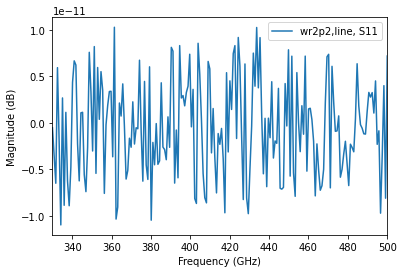

In [ ]:
delayshort.plot_s_db()

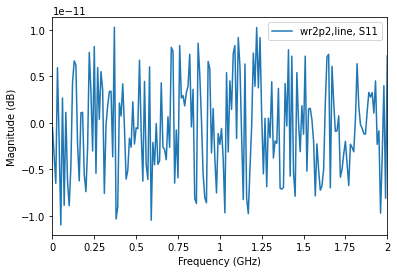

In [ ]:
delayshort.plot_s_db()

In [ ]:
l1

In [ ]:
ntw.s.shape

(1001, 2, 2)

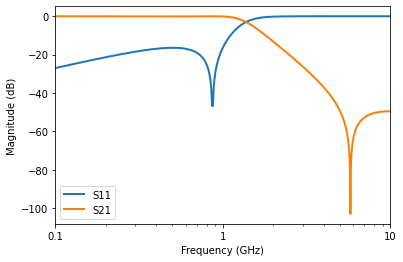

In [ ]:
ntw.plot_s_db(m=0, n=0, lw=2, logx=True)
ntw.plot_s_db(m=1, n=0, lw=2, logx=True)

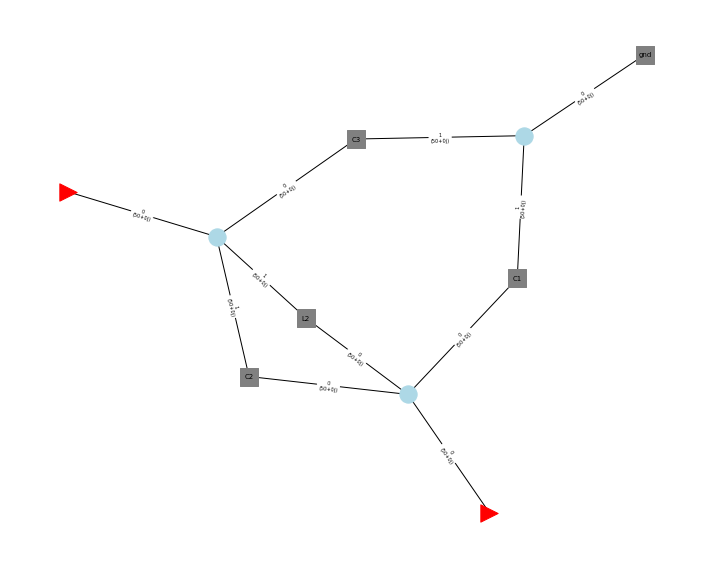

In [ ]:
cir.plot_graph(network_labels=True, edge_labels=True)

In [ ]:
passband_designer = rf.Network('designer_capacitor_30_80MHz_adv.s2p')

FileNotFoundError: ignored

In [ ]:
freq = rf.Frequency(0.1, 1, 101)
line = rf.DefinedGammaZ0(frequency=freq, z0=50)
passband_manual = line.shunt_capacitor(25.406e-12) ** line.shunt_inductor(4.154e-9) ** \
                  line.capacitor(2.419e-12) ** line.inductor(43.636e-9) ** \
                  line.shunt_capacitor(25.406e-12) ** line.shunt_inductor(4.154e-9)

In [ ]:
line = rf.media.DefinedGammaZ0(frequency=freq)
C1 = line.capacitor(25.406e-12, name='C1')
C2 = line.capacitor(2.419e-12, name='C2')
C3 = line.capacitor(25.406e-12, name='C3')
L1 = line.inductor(4.154e-1, name='L1')
L2 = line.inductor(43.636e-9, name='L2')
L3 = line.inductor(4.154e-9, name='L3')
port1 = rf.Circuit.Port(frequency=freq, name='port1', z0=50)
port2 = rf.Circuit.Port(frequency=freq, name='port2', z0=50)
ground1 =  rf.Circuit.Ground(frequency=freq, name='ground1', z0=50)
ground2 =  rf.Circuit.Ground(frequency=freq, name='ground2', z0=50)
ground3 =  rf.Circuit.Ground(frequency=freq, name='ground3', z0=50)
ground4 =  rf.Circuit.Ground(frequency=freq, name='ground4', z0=50)

connections = [
    [(port1, 0), (C1, 0), (L1, 0), (C2, 0)],
    [(C2, 1), (L2, 0)],
    [(L2, 1), (C3, 0), (L3, 0), (port2, 0)],
    # grounding must be done on ground ntw having different names
    [(C1, 1), (ground1, 0)],
    [(C3, 1), (ground2, 0)],
    [(L1, 1), (ground3, 0)],
    [(L3, 1), (ground4, 0)],
]

circuit = rf.Circuit(connections)
passband_circuit = circuit.network

NameError: ignored

In [ ]:
passband_circuit.plot_s_db(m=0, n=0, lw=2)
passband_circuit.plot_s_db(m=1, n=0, lw=2)
# passband_designer.plot_s_db(m=0, n=0, lw=2, ls='-.')
# passband_designer.plot_s_db(m=1, n=0, lw=2, ls='-.')

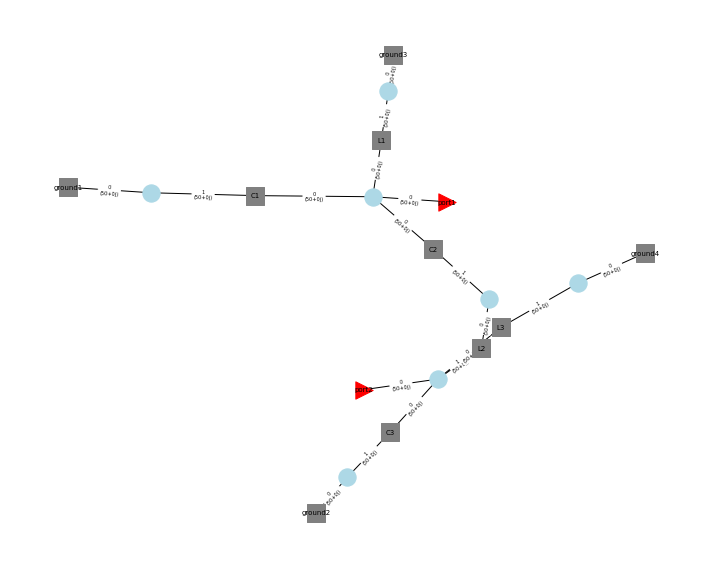

In [ ]:
circuit.plot_graph(network_labels=True, port_labels=True, edge_labels=True)

In [ ]:
freq = rf.Frequency(0.00001, 10, 1001, sweep_type='log')
line = rf.media.DefinedGammaZ0(frequency=freq)
C12 = line.capacitor(100e-12, name='C12')
C13 = line.capacitor(10e-9, name='C13')
Cout = line.capacitor(0.1e-6, name='Cout')
L1 = line.inductor(56e-9, name='L1')
L2 = line.inductor(56e-9, name='L2')
L3 = line.inductor(0.001e-6, name='L3')
R2 = line.resistor(0.00001, name='R2')
R3 = line.resistor(340, name='R3')
port_RF = rf.Circuit.Port(frequency=freq, name='port_RF', z0=50)
port_MW = rf.Circuit.Port(frequency=freq, name='port_MW', z0=50)
port_OUT = rf.Circuit.Port(frequency=freq, name='port_out', z0=50)
ground1 =  rf.Circuit.Ground(frequency=freq, name='ground1', z0=50)

connections = [
               [(port_RF, 0), (L3, 0), (R2, 0)],
               [(L3, 1), (C12, 0), (L2, 0)],
               [(R2, 1), (C13, 0)],
               [(C13, 1), (ground1, 0), (R3, 0)],
               [(R3, 1), (C12, 1)],
               [(L2, 1), (L1, 0)],
               [(port_MW, 0), (L1, 1), (Cout, 0)],
               [(port_OUT, 0), (Cout, 1)]
]

connections = [
               [(port_RF, 0), (L3, 0), (R2, 0)],
               [(L3, 1), (C12, 0), (L2, 0)],
               [(R2, 1), (C13, 0)],
               [(C13, 1), (ground1, 0), (R3, 0)],
               [(R3, 1), (C12, 1)],
               [(L2, 1), (L1, 0)],
               [(port_MW, 0), (Cout, 0)],
               [(Cout, 1), (L1, 1), (port_OUT, 0)]
]

circuit = rf.Circuit(connections)
passband_circuit = circuit.network

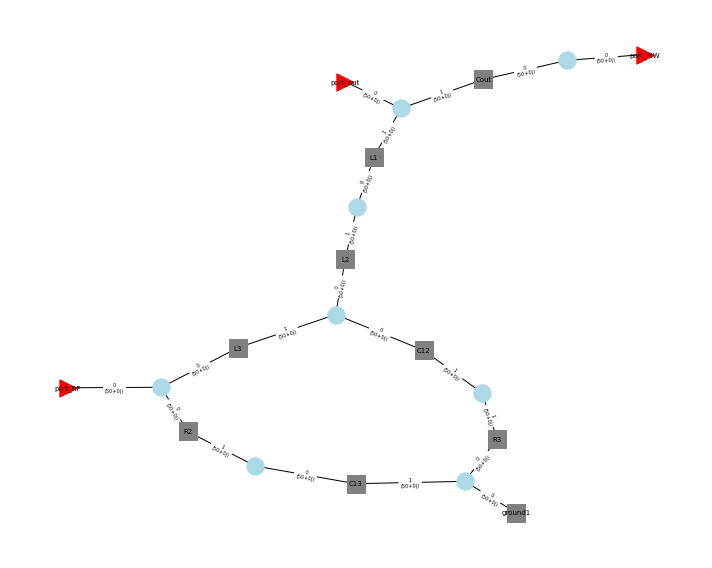

In [ ]:
circuit.plot_graph(network_labels=True, port_labels=True, edge_labels=True)

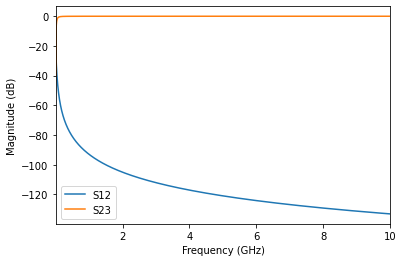

In [ ]:
passband_circuit.plot_s_db(m=0, n=1)
passband_circuit.plot_s_db(m=1, n=2)

In [ ]:
s_db = passband_circuit.s_db

fig = go.Figure()
fig.add_scatter(x=freq.f, y=s_db[:, 0, 2], name='RF Line')
# fig.add_scatter(x=freq.f, y=s_db[:, 1, 1], name='RF Line reflectance')
fig.add_scatter(x=freq.f, y=s_db[:, 1, 2], name='MW LINE')
fig.add_scatter(x=freq.f, y=s_db[:, 0, 1])
# fig.add_scatter(x=freq.f, y=s_db[:, 1, 2], name='Isolation')

In [ ]:
freq = rf.Frequency(0.1, 1, 101, sweep_type='log', unit='ghz')
line = rf.media.DefinedGammaZ0(frequency=freq)
line = rf.media.DefinedGammaZ0(frequency=freq)
C1 = line.capacitor(25.406e-12, name='C1')
C2 = line.capacitor(2.419e-12, name='C2')
C3 = line.capacitor(25.406e-12, name='C3')
L1 = line.inductor(4.154e-9, name='L1')
L2 = line.inductor(43.636e-9, name='L2')
L3 = line.inductor(4.154e-9, name='L3')
port1 = rf.Circuit.Port(frequency=freq, name='port1', z0=50)
port2 = rf.Circuit.Port(frequency=freq, name='port2', z0=50)
ground1 =  rf.Circuit.Ground(frequency=freq, name='ground1', z0=50)
ground2 =  rf.Circuit.Ground(frequency=freq, name='ground2', z0=50)
ground3 =  rf.Circuit.Ground(frequency=freq, name='ground3', z0=50)
ground4 =  rf.Circuit.Ground(frequency=freq, name='ground4', z0=50)

connections = [
    [(port1, 0), (C1, 0), (L1, 0), (C2, 0)],
    [(C2, 1), (L2, 0)],
    [(L2, 1), (C3, 0), (L3, 0), (port2, 0)],
    # grounding must be done on ground ntw having different names
    [(C1, 1), (ground1, 0)],
    [(C3, 1), (ground2, 0)],
    [(L1, 1), (ground3, 0)],
    [(L3, 1), (ground4, 0)],
]

circuit = rf.Circuit(connections)
passband_circuit = circuit.network
passband_circuit_2 = passband_circuit.copy()
passband_circuit.name = 'Pass-band circuit'

t_in = line.tee()
t_out = line.tee()

ntw = rf.connect(t_in, 1, passband_circuit, 0)
ntw = rf.connect(ntw, 2, passband_circuit_2, 0)
ntw = rf.connect(ntw, 0, t_out, 1)
ntw = rf.innerconnect(ntw, 1, 2)
ntw = rf.connect(passband_circuit, 1, passband_circuit_2, 0)
ntw

2-Port Network: 'Pass-band circuit',  0.1-1.0 GHz, 101 pts, z0=[50.+0.j 50.+0.j]

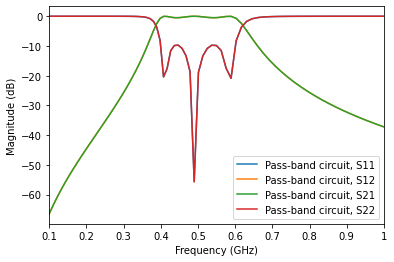

In [ ]:
passband_circuit.plot_s_db()

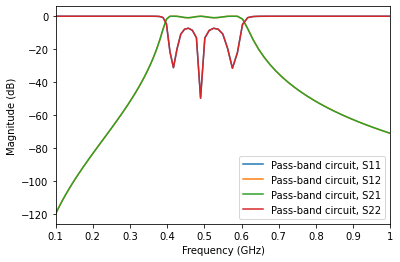

In [ ]:
ntw.plot_s_db()

In [ ]:
rf.Network(passband_manual)

AttributeError: ignored